In [1]:
from datetime import datetime
from IPython.display import display, Markdown

todays_date = str(datetime.now().date())

display(Markdown(f'#### Last update: {todays_date}'))

#### Last update: 2026-01-27

**Numerical Methods II - Lecture #3**  - *ICTP*

Index <a id='index_id'></a>
1. [L3](#L3_id)
2. [Exercises](#exercises_id)

We'll continue to study the 1D advection equation

$$ \frac{\partial \phi(x,t)}{\partial t} + u \frac{\partial \phi(x,t)}{\partial x} = 0$$

<div class="alert alert-info">
    Let us remember the <b>two-variable Taylor expansion</b> 
    <br> $$f(x+\Delta x, t + \Delta t) =  \sum_{i=0}^{\infty} \frac{1}{i!} \left( \Delta x \frac{\partial}{\partial x} + \Delta t \frac{\partial}{\partial t} \right)^i f(x,t) \ ,$$
    <br> where all derivatives are evaluated at $(x,t)$.
</div> 

#### L3 <a id='L3_id'></a> ([Index](#index_id))

##### Recap

From the Taylor expansion we can derive the CTCS scheme using the centered difference formula

$$f(x,t \pm \Delta t) = f(x,t) \pm \frac{\partial f(x,t)}{\partial t} \Delta t + \frac{1}{2} \frac{\partial^2 f(x,t)}{\partial t^2} \Delta t^2 + \underbrace{\mathcal{O}(\Delta t ^3)}_{\text{truncation error}}$$

$$\rightarrow \frac{\partial f(x,t)}{\partial t} = \frac{f(x,t+ \Delta t) - f(x,t - \Delta t)}{2 \Delta t} + \mathcal{O}(\Delta t ^3)$$

$$0 = \frac{\partial \phi(x,t)}{\partial t} + u \frac{\partial \phi(x,t)}{\partial x} \approx \frac{\phi(x,t+\Delta t) - \phi(x,t-\Delta t)}{2 \Delta t} + u \cdot \frac{\phi(x+\Delta x,t) - \phi(x- \Delta x,t)}{2 \Delta x} + \mathcal{O}(\Delta x ^3, \Delta t ^3)$$


<div class="alert alert-success">In our notation
    $$ \rightarrow \phi_j^{n+1} = \phi_j^{n-1} - c (\phi_{j+1}^n - \phi_{j-1}^n) + \mathcal{O}(\Delta x ^3, \Delta t ^3)$$</div>

##### CTCS stability analysis

- As before, we'll consider a single Fourier component with an **arbitrary** $k$, and solve for the amplification factor in terms of the grid spacing, $\Delta x$, and the time step, $\Delta t$.
- We can then find conditions for the stability of the mode.

The general Fourier decomposition is 

$$ \phi(x, t) = \sum_m \gamma_j^n(m) =  \sum_m u_m(t) e^{ik_m \ x }$$

In a discrete system of length $L,$ and $N$ points

$$ \phi(x_j, t_n) \equiv \phi_j^n = \sum_m u^n_m e^{ik_m \ j \Delta x } \ ,$$

with $k = \frac{2 \pi m}{L} = \frac{2 \pi m}{N \Delta x}$ and $m = 0,...,N/2$ . We define the amplification factor as the multiplicative factor that affects our components when taking a time step. This is, 

\begin{equation}
 u_m^{n+1} = A_m u_m^n \ .
\end{equation}

$$ \phi(x_j, t_n) \equiv \phi_j^n = \sum_m \left ( A^n u^0_m \right ) e^{ik_m \ j \Delta x } \ ,$$

Having in mind that
 
$$ u_m^{n-1} = \frac{1}{A} u_m^n \ ,$$

we substitute a single component, $\gamma_j^n(m)$, into our finite difference scheme

$$ \frac{u_m^{n+1} \cancel{e^{i k_m j \Delta x}} - u_m^{n-1} \cancel{e^{i k_m j \Delta x}}}{2 \Delta t} = -u \cdot \frac{u_m^n e^{ik_m(\cancel{j}+1)\Delta x} - u_m^n e^{i k_m (\cancel{j}-1)\Delta x}}{2 \Delta x}$$

$$ A-1/A = - c \left( e^{i k \Delta x} - e^{-ik \Delta x}\right)$$
$$  A^2 + A(2 ic \ sin(k \Delta x)) - 1 = 0$$ 
$$ \rightarrow A_{\pm} = -ic \ sin(k \Delta x) \pm \sqrt{1 - c^2 \ sin^2(k \Delta x)} $$ 


We here need to consider two cases

1. For $|c| \gt 1$ there will be values of $k$ where $(c \ sin(k \Delta x))^2 > 1$. Rearranging

    $$ A_{\pm} = i \cdot \left( -c \ sin(k \Delta x) \pm \sqrt{c^2 \ sin^2(k \Delta x) - 1} \right)$$

    we see that, for some values of $k$

$$ \rightarrow |A_{\pm}|^2 = \left( -c \ sin(k \Delta x) \pm \sqrt{c^2 \ sin^2(k \Delta x) - 1} \right)^2 \ge 1 \ .$$

2. For $|c| \le 1$ the squared modulus is

$$ |A_{\pm}|^2 = c^2 sin^2(k \Delta x) + 1 - c^2 sin^2(k \Delta x) = 1$$

<div class="alert alert-success"> 

- The CTCS scheme is therefore conditionally stable with the constraint $|c| = |u| \Delta t / \Delta x \le 1$. 
- If the CFL condition is met, then the scheme is neutrally stable. This term refers to schemes where $|A| = 1$ and errors don't grow nor decay.
- The stability of the scheme does not depend on the sign of the advection velocity</div>

##### Physical and computational modes

Using a second order difference equation for our scheme grants us desirable properties. This comes, however, at a cost. By introducing a second root to our solution we also introduce a numerical artifact known as computational mode, that, as we'll see, does not correspond to any solution of the original equation. We'll know try to understand the implications.

Our solution for the $k_m$ component has the form

$$ u_m^n = \left( c_1 A^n_{+} + c_2 A^n_{-} \right) e^{ik_m \ j \Delta x}$$

with $c_1$ and $c_2$ being complex constants set by the initial conditions and

$$ A_{\pm} = i \cdot \left( -c \ sin(k \Delta x) \pm \sqrt{c^2 \ sin^2(k \Delta x) - 1} \right) \ .$$

To check for consistency with the physical equation we take the limit $\Delta t \rightarrow 0$. Remember that $c \equiv u \Delta t / \Delta x$. We then have

$$ \lim_{\Delta t \rightarrow 0} A_+ = 1 \qquad \lim_{\Delta t \rightarrow 0} A_- = -1$$

From this we see that the $(-)$ solution flips sign every time step. This means

$$ u_-^{n+1} = -u_-^n \ ,$$

so

\begin{align}
    n &= 1 \qquad u^1 \sim -u^0 \\
    n &= 2 \qquad u^2 \sim +u^0 \\
    n &= 3 \qquad u^3 \sim -u^0
\end{align}

This is a $2 \Delta t$ oscillation, the highest frequency the grid can sustain. We'll now check the sign of the scheme's advection velocity. Let us write the amplification factor as

$$ A_{\pm} = \underbrace{|A_{\pm}|}_{=1} \ e ^{i \theta} = -i\sigma \pm \sqrt{1- \sigma^2} \ .$$ 

\begin{align}
    A_+ & =  1 \cdot e^{i \theta_+} \\
    A_- & =  1 \cdot e^{i (\theta_- + \underbrace{\pi}_{\text{sign flip}})}
\end{align}

We adopted the notation $\sigma \equiv c \ sin(k \Delta x)$ for convenience. It is useful to visualize time stepping in the complex plane. Each time we take a time step, we are making a phase shift in the unit circle ($|A| = 1$). This shift is given by our numerical scheme, with a numerical velocity, $v_{CTCS}$, equal to

$$ v_{CTCS} = - \frac{\theta}{k \Delta t} \ .$$

A perfect scheme should move in the same direction and magnitude of the advection velocity. We'll now see that this is not the case. Since

$$ e^{i \theta} = cos(\theta) + i sin(\theta)$$

and 

$$ \theta = tan \left(\frac{sin(\theta)}{cos(\theta)} \right) \ ,$$

the phase shift reads as

$$ \theta = arctan \left( \frac{- \sigma}{\pm \sqrt{1 - \sigma^2}} \right) \ .$$

We'll now concentrate in the small $\sigma$ limit. Using

\begin{align}
    (1-x)^{-1/2} &= (1 + 1/2 \sigma^2 + ...) \\
    arctan(z) &= z - \frac{z^3}{3} + \frac{z^5}{5} - ...
\end{align}

We obtain

\begin{align}
    \theta_{+} &\approx -\sigma \\
    \theta_{-} &\approx +\sigma
\end{align}

Therefore, for the $(+)$ case

\begin{align}
    v^+_{CTCS} = - \frac{\theta^+}{k \Delta t} = \frac{c \ sin(x \Delta x)}{k \Delta t} = u \cdot \frac{sin(k \Delta x)}{k \Delta x}
\end{align}

<div class="alert alert-success"> 

- The $(+)$ solution moves in the same direction as the advection velocity. We'll then call this mode the physical mode, *p*. <div>

Since $sin(k \Delta x) \le k \Delta x$
$$ \rightarrow v_p  \le u $$

<div class="alert alert-danger"> 

- The physical mode laggs behind the true solution <div>

For the $(-)$ case, which we'll label as computational mode,

$$ v_c = - u \cdot \frac{sin(k \Delta x)}{k \Delta x}$$

<div class="alert alert-danger"> 
    
- The computational mode moves in the opposite direction <div>

Summary 
<div class="alert alert-info">

- The physical and computational modes lagg behind
- The computational mode moves in the opposite direction
- The computational mode oscillates at the highest frequency the grid can sustain $\rightarrow 2 \Delta t$ </div>

##### Filters

The **Robert-Asselin Filter** 

- Is a running weighted mean. It acts as a *low-pass* filter (filters out high frequencies).
- 'Glues' together the two 'separate' grids, keeping them from decoupling.

The algorithm follows a 'calculate then correct' philosophy:

1. **Prediction** : Take a leapfrog time step, $\phi^n \rightarrow \ \phi^{n +1} $, using both, filtered values from the past and raw values of the present
   $$ \phi^{n+1}_j = \overline{\phi^{n-1}_j} - c (\phi_{j+1}^n - \phi_{j-1}^n)$$
3. **Correction** : Use the new value to calculate an average on the previous point
   $$ \overline{\phi^n} = \phi^n + \alpha (\overline{\phi^{n-1}} - 2 \phi^n + \phi^{n+1}) = (1-2 \alpha) \phi^n + \alpha (\phi^{n+1} + \overline{\phi^{n-1}})$$
   with $\alpha$ being a free parameter.

By applying this filter we are effectively damping both solutions. Indeed, the filter itself is actually the discrete form of a diffusion equation

   $$ \alpha (\phi^{n-1} - 2 \phi^n + \phi^{n+1} )= \alpha (\Delta t ^2 \frac{\partial^2 \phi}{\partial t^2} + \mathcal{O}(\Delta t ^4) )  = \alpha (\Delta t ^2 u^2 \frac{\partial^2 \phi}{\partial x^2} + \mathcal{O}(\Delta t ^4)) \ .$$

One could also show that, the amplification factor for the new filtered scheme is less than $1$.


The **Robert-Asselin-William** (RAW) filter

- It's an improvement of the RA filter that damps the modes assymetrically (by properly tuning the filter parameters). It does not damp the physical mode as much, while keeping a strong damping on the computational mode.
- It involves an extra correction step, where the new time step $\phi^{n+1}$ is immediately modified. This modification is temporal, and is corrected in the following time step. The mid point value used in the Leapfrog at time $n$ scheme which we've denoted as $\phi^n$ is then this temporally modified version calculated at time $n-1$. We'll denote it as $\hat{\phi}^n$.

The algorithm reads as

1. **Prediction** : Take a leapfrog time step, $\phi^n \rightarrow \ \phi^{n +1} $, using the new scheme
   $$ \phi^{n+1}_j = \overline{\phi^{n-1}_j} - c (\hat{\phi}_{j+1}^n - \hat{\phi}_{j-1}^n)$$
2. **Correction # 1** : final value for time $n$

$$ \overline{\phi^{n}} = \hat{\phi}^n + \alpha (\overline{\phi^{n-1}} - 2 \hat{\phi}^n + \phi^{n+1})$$

3. **Correction # 2** : temporary value for time $n+1$

$$ \hat{\phi}^{n+1} = \phi^{n+1} + \alpha (1 - \beta)(\overline{\phi^{n-1}} - 2 \hat{\phi}^n + \phi^{n+1})$$

with $\beta$ being another free parameter. 


<div class="alert alert-info">
    
- One then needs to store temporary values from one time step to the next.
- Fine tuning the filter parameters $(\beta, \alpha)$ is important.
<div>

#### Exercises <a id='exercises_id'></a> ([Index](#index_id))

We'll here solve the linear advection equation using the CTCS scheme, to which we'll sequentially add the filter corrections. Try to observe the features we've explored in $L3$.

1. Write a program to integrate the linear advection equation using the CTCS scheme in the domain $0 \le x \le 500 \  [m]$ with $u = -0.31 \ m/s$. Let $\Delta x = 0.1 \ m$ and assume periodic boundary conditions. Assume the initial shape to be:

\begin{equation}
  \phi(x,0) =
    \begin{cases}
      0.1 & \text{for $x < 200$}\\
      2.0 & \text{for $200 \le x < 250$}\\
      1.0 & \text{for $250 \le x \le 300$}\\
      0.1 & \text{for $x > 300$}
    \end{cases}       
\end{equation}


- Integrate forward and show solutions from $t = 0 \ s$ up to $t = 1000\ s $ every $200 \ s $ and explain the characteristics of the solution.

2. Repeat the exercise implementing the RA filter with $\alpha = 0.1$
3. Repeat the exercise implementing the RAW filter with $\alpha = 0.05$ and $\beta = 0.53$

[0.000e+00 1.000e-01 2.000e-01 ... 4.998e+02 4.999e+02 5.000e+02]
-0.155


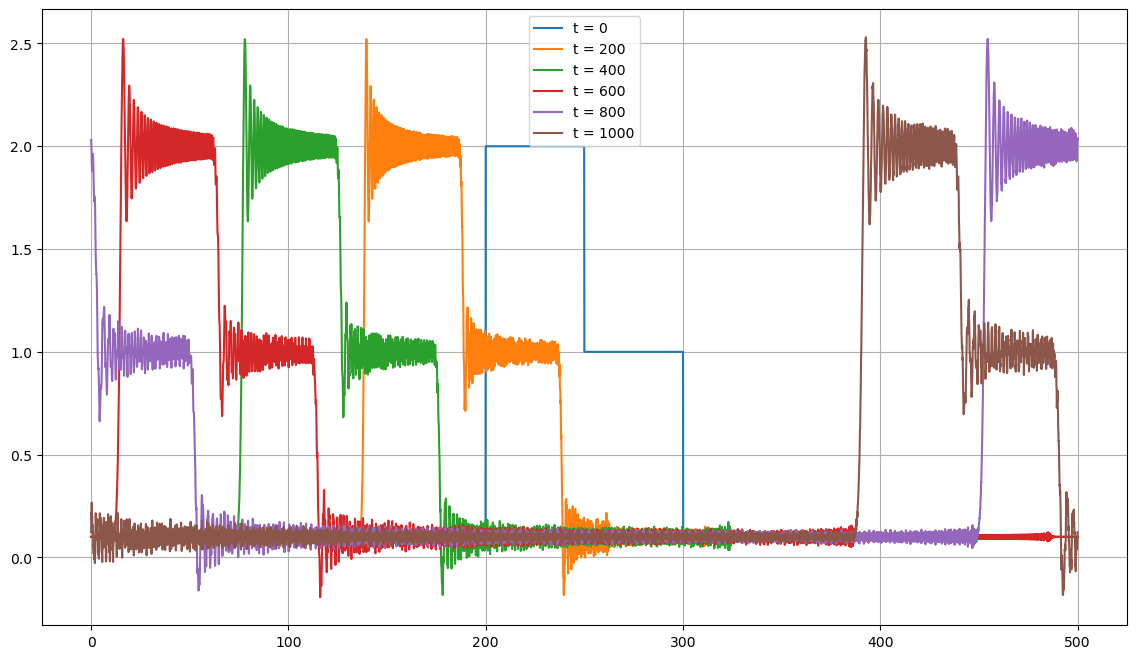

'\nOne of the characteristics of the moving solutions is that the amplitude (damped) gets smaller for c << 1, that is small dt, while the width gets larger.\nI am not sure, but I think this has something to do with energy conservation as the area below the curve is conserved in time. Or is it just because \nof the interpolation errors?\n\nFor c = 1, that is dt = dx/u, the shape is conserved, there is no damping nor broadening effect.\n\n'

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# initial condition
def phi_0(x):
    y = np.zeros(x.size)
    for i in range(x.size):
        if x[i] < 200 or x[i] > 300:
            y[i] = 0.1
        elif  200 <= x[i] < 250:
            y[i] = 2.0
        elif 250 <= x[i] <= 300:
            y[i] = 1.0    
    return y     

def upstream_scheme(x0, xmax, t0, tmax, u, dx, dt, tp):
    x = np.arange(x0, xmax+dx, dx)
    # index

    N = x.size - 1
    c = u*dt/dx

    print(x)
    print(c)
    
    phi0 = phi_0(x)
    phi1 = np.zeros_like(phi0)
    phi1[:N] = (1 + c) * phi0[:N] - c * phi0[1:]
    phi1[N]  = (1 + c) * phi0[N]  - c * phi0[1]

    t = t0 + dt
    plt.figure(figsize=(14,8))
    plt.plot(x, phi0, label='t = {}'.format(int(t0)))
    plt.grid(True)
    
    while t<= tmax:
        phi_new = np.zeros_like(phi1)

        phi_new[0]  = phi0[0] - c*(phi1[1] - phi1[N-1])

        phi_new[1:N] = phi0[1:N] - c*(phi1[2:] - phi1[:N-1])

        phi_new[N]  = phi0[N] - c*(phi1[1] - phi1[N-1])

        # update phi 
        phi0 = phi1
        phi1 = phi_new
        t += dt
    
        if t%tp < dt: 
            plt.plot(x, phi_new, label ='t = {}'.format(int(t)))
            plt.legend()

    # plt.title('Upwind scheme of LAE: $\Delta x= 0.1$, $u = 0.087 $, $\Delta t$ = {}'.format(round(dt, 2)))
    # plt.savefig('Plots/upwind_laeq{}.png'.format(round(dt, 2)))
    plt.show()

u = -0.31
dx = 0.1
dt = 0.05
x0 = 0
xmax = 500
t0 = 0
tmax = 1000
tp = 200

upstream_scheme(x0, xmax, t0, tmax, u, dx, dt, tp)

"""
One of the characteristics of the moving solutions is that the amplitude (damped) gets smaller for c << 1, that is small dt, while the width gets larger.
I am not sure, but I think this has something to do with energy conservation as the area below the curve is conserved in time. Or is it just because 
of the interpolation errors?

For c = 1, that is dt = dx/u, the shape is conserved, there is no damping nor broadening effect.

"""
